In [29]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [30]:
# https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/data

In [31]:
data =  pd.read_csv('E:/UK Assignments/Applied  Data Science 1/train.csv')

In [32]:
data.head() 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [33]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [34]:
# Correlation
data.corr

<bound method DataFrame.corr of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [35]:
# Calculate skewness and kurtosis for Sales column
Sales_skewness = skew(data['Sales'])
Sales_kurtosis = kurtosis(data['Sales'])

print(f"Skewness of Sales: {Sales_skewness}")
print(f"Kurtosis of Sales: {Sales_kurtosis}")

Skewness of Sales: 12.98149551275044
Kurtosis of Sales: 304.2891692001746


In [36]:
data.shape

(9800, 18)

In [37]:
data.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

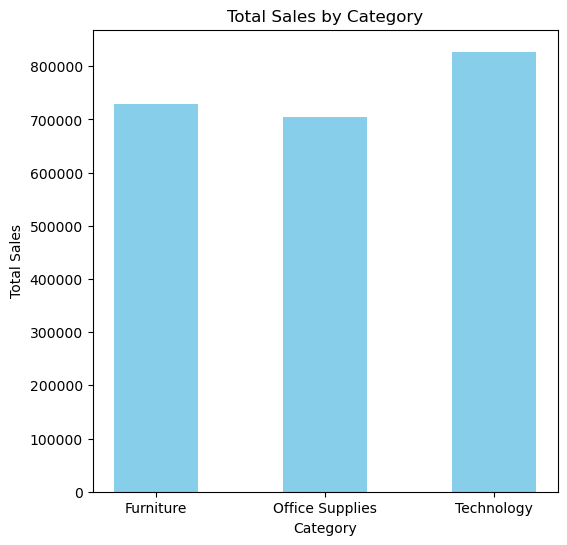

In [38]:
# Convert date columns to datetime format
def total_category_sales(data):
    data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')
    data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y')
    # 1. Bar Plot: Sales by Category
    category_sales = data.groupby('Category')['Sales'].sum()
    plt.figure(figsize=(6, 6))
    plt.bar(category_sales.index, category_sales.values, color='skyblue',width = 0.5)
    plt.title('Total Sales by Category')
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.show()
total_category_sales(data)

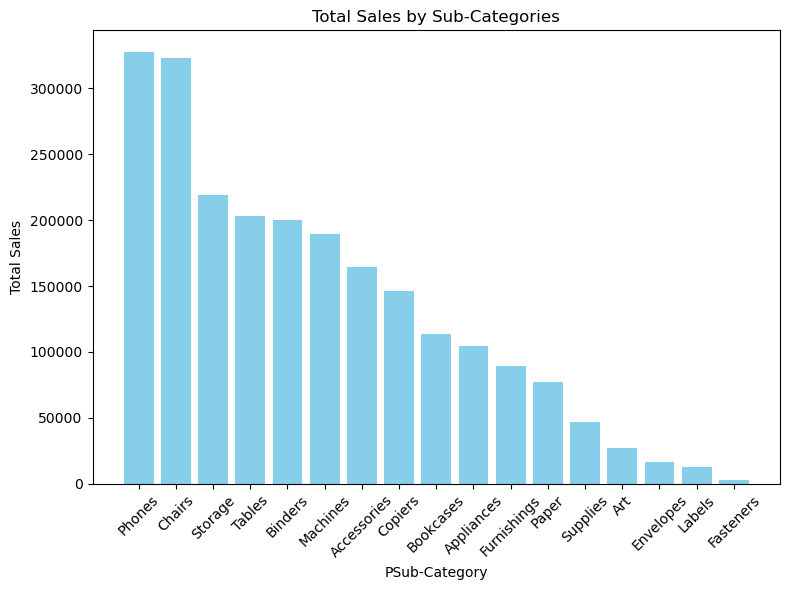

In [39]:
def total_sub_categories(data):
     product_sales = data.groupby('Sub-Category')['Sales'].sum().reset_index()
     # Sort values for better visualization
     product_sales = product_sales.sort_values(by='Sales', ascending=False)
     # Plotting
     plt.figure(figsize=(8, 6))
     plt.bar(product_sales['Sub-Category'], product_sales['Sales'], color='skyblue')
     plt.title('Total Sales by Sub-Categories')
     plt.xlabel('PSub-Category')
     plt.ylabel('Total Sales')
     plt.xticks(rotation=45)
     plt.tight_layout()
     plt.show() 
total_sub_categories(data)

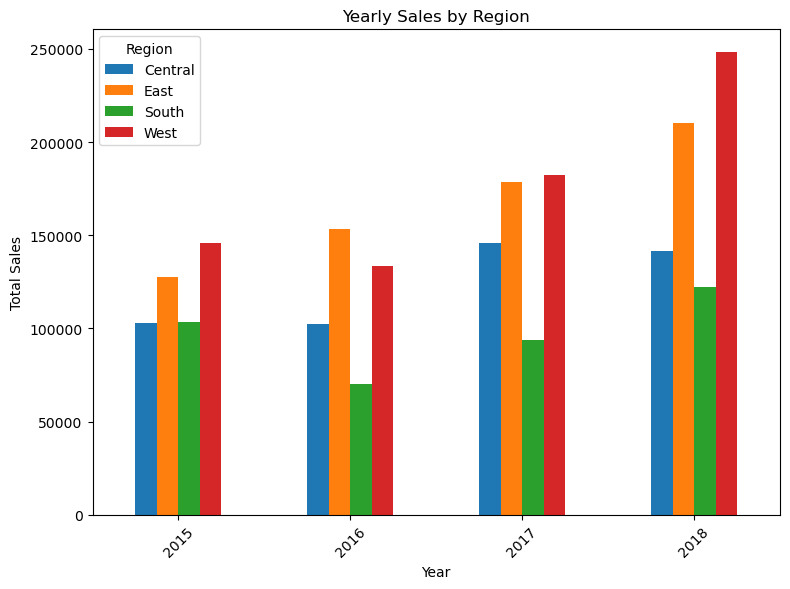

In [40]:
def yearly_sales_by_region(data):
    data['Year'] = data['Order Date'].dt.year

    # Group by 'Year' and 'Region' to calculate total sales for each group
    grouped_data = data.groupby(['Year', 'Region'])['Sales'].sum().unstack()
    # Plotting
    grouped_data.plot(kind='bar', figsize=(8, 6), width=0.5)
    plt.title('Yearly Sales by Region')
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.legend(title='Region')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
yearly_sales_by_region(data)

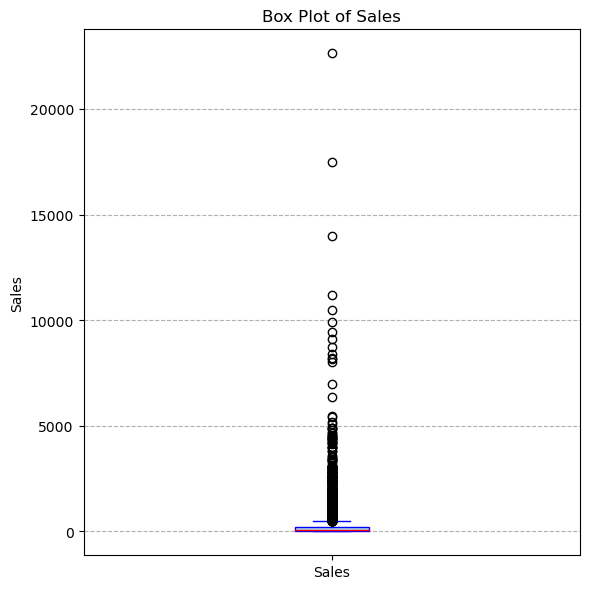

In [41]:
# Creating a box plot for Sales
def box_plot_of_sales(data):
    plt.figure(figsize=(6, 6))
    plt.boxplot(data['Sales'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'),
                whiskerprops=dict(color='blue'), capprops=dict(color='blue'), 
                medianprops=dict(color='red'))
    plt.title('Box Plot of Sales')
    plt.ylabel('Sales')
    plt.xticks([1], ['Sales'])  # Custom x-tick for single box
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()
box_plot_of_sales(data)

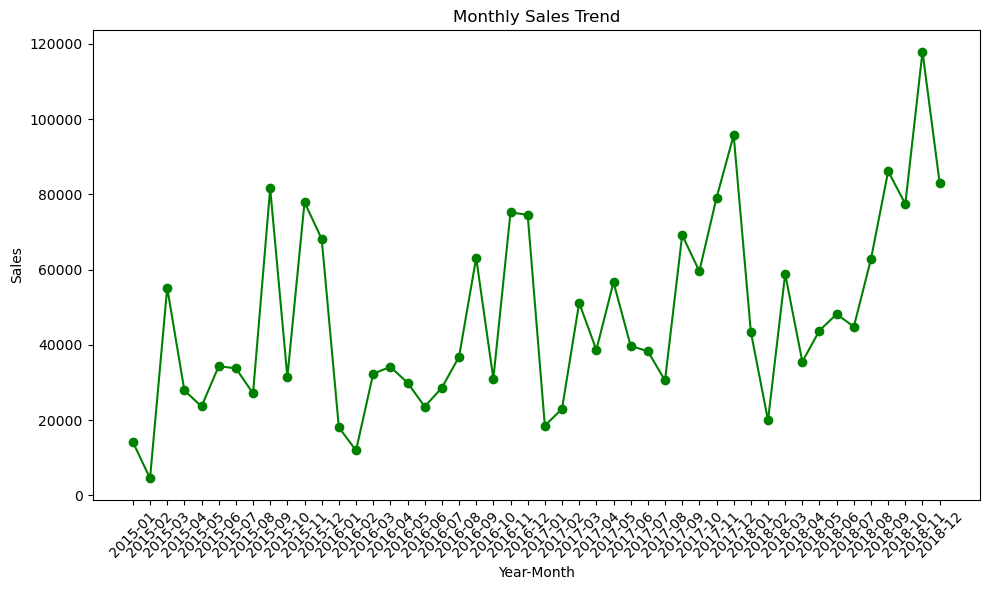

In [42]:

# Extract year and month from 'Order Date' and group by them
def Monthly_Sales_Trend(data):
    data['Year-Month'] = data['Order Date'].dt.to_period('M')
    monthly_sales = data.groupby('Year-Month')['Sales'].sum()
    # Plotting the monthly sales trend
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', color='green')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Year-Month')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
Monthly_Sales_Trend(data)